In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'D:\\WORK Space\\My Portfolio\\House Pricing\\0-Data\\processed data\\Data for Models\\train_prep_data.csv' 
df = pd.read_csv(path, index_col=0)
df.head()

,LotFrontage,LotArea,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,log_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.150685,0.033420,3.0,6.0,0.949275,0.883333,1.0,0.12250,2.0,2.0,...,2.0,0.368280,5.0,5.0,2.0,0.000000,0.082210,4.0,208500.0,12.247694
2,0.202055,0.038795,3.0,5.0,0.753623,0.433333,1.0,0.00000,3.0,1.0,...,2.0,0.309140,5.0,5.0,2.0,0.209270,0.000000,4.0,181500.0,12.109011
3,0.160959,0.046507,0.0,6.0,0.934783,0.866667,1.0,0.10125,2.0,2.0,...,2.0,0.408602,5.0,5.0,2.0,0.000000,0.056604,4.0,223500.0,12.317167
4,0.133562,0.038561,0.0,6.0,0.311594,0.333333,1.0,0.00000,3.0,0.0,...,3.0,0.431452,5.0,5.0,2.0,0.000000,0.047170,0.0,140000.0,11.849398
5,0.215753,0.060576,0.0,7.0,0.927536,0.833333,1.0,0.21875,2.0,2.0,...,3.0,0.561828,5.0,5.0,2.0,0.134831,0.113208,4.0,250000.0,12.429216


### Outliers Everywhere

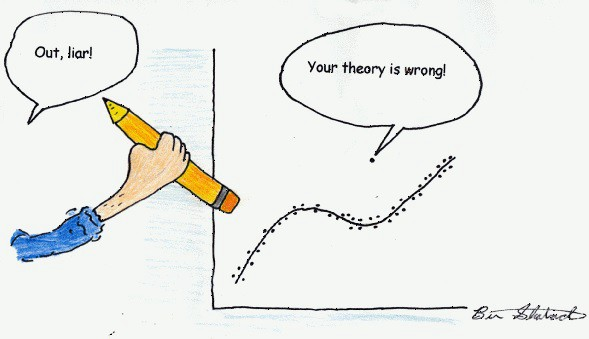

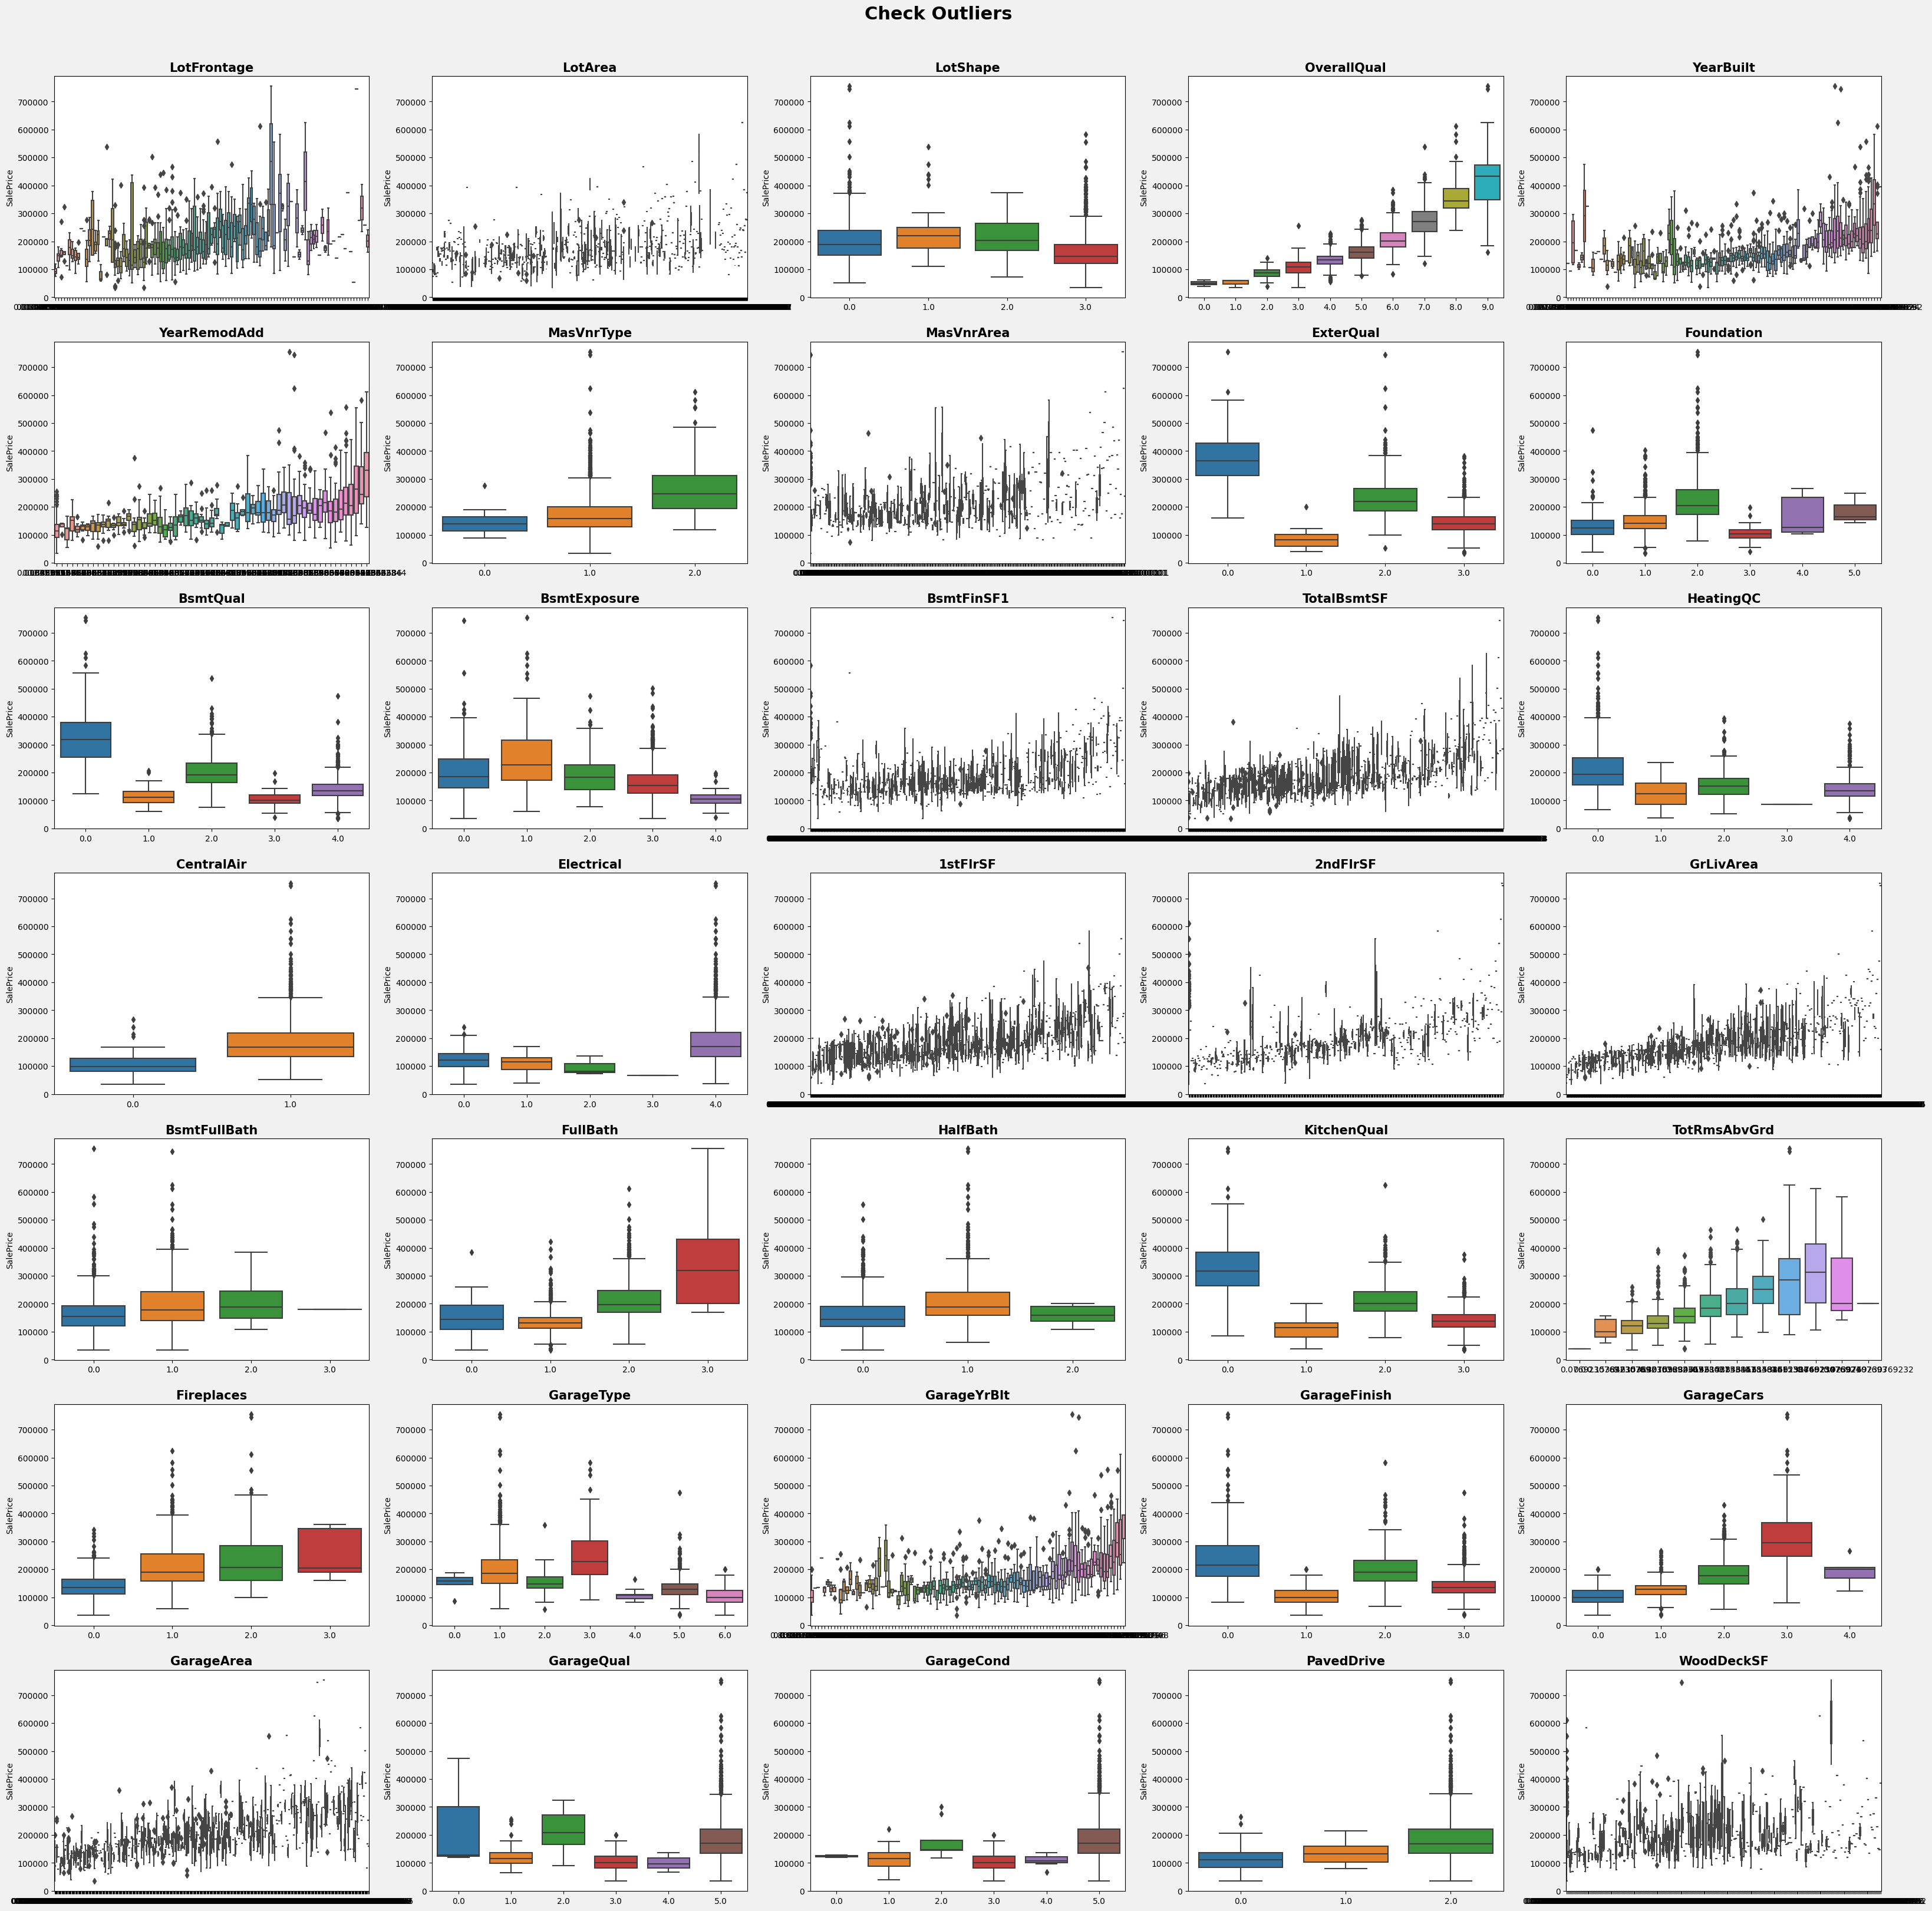

In [3]:
def plot_con_feat_to_y(df, ax, col_name, target='SalePrice'):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
    sns.boxplot(ax=ax, data=df, x=col_name, y=target)
    ax.set_xlabel("")

fig = plt.figure(figsize=(40,40))
gs  = fig.add_gridspec(7, 5)
axes = []

for i in range(7):
    for j in range(5):
        ax = fig.add_subplot(gs[i,j])
        axes.append(ax)



fig.suptitle(t='Check Outliers',y=0.91, fontweight ="bold",fontsize=22)
fig.set_facecolor("#F1F1F1")

num_cols = df.columns
for ax,col_name in zip(axes,num_cols):
    plot_con_feat_to_y(df, ax, col_name)

plt.show()

## Removing All Outliers from All Columns [Z-score Method]

In [4]:
def outliers_zscore(data):
    idxs_outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i, xi in enumerate(data):
        z_score= (xi - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            idxs_outliers.append(i)
    return zscore, idxs_outliers

zscore, outliers = outliers_zscore(df.SalePrice)
print("The Number of outliers in SalePrice:", len(outliers))

The Number of outliers in SalePrice: 22


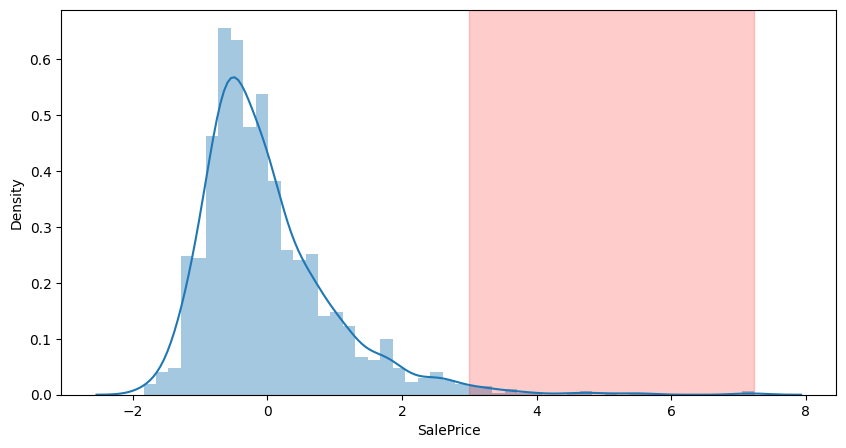

In [5]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3, xmax= max(zscore), alpha=0.2, color='red')
plt.xlabel("SalePrice")
plt.show()

In [6]:
new_df = df.copy()
cols = new_df.columns

idx_to_remove = set()

for col in cols:
    zscore, outliers = outliers_zscore(new_df[col])
    idx_to_remove = idx_to_remove | set(outliers)
    

new_df.drop(idx_to_remove, inplace=True)
new_df

,LotFrontage,LotArea,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,log_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.150685,0.033420,3.0,6.0,0.949275,0.883333,1.0,0.122500,2.0,2.0,...,2.0,0.368280,5.0,5.0,2.0,0.000000,0.082210,4.0,208500.0,12.247694
2,0.202055,0.038795,3.0,5.0,0.753623,0.433333,1.0,0.000000,3.0,1.0,...,2.0,0.309140,5.0,5.0,2.0,0.209270,0.000000,4.0,181500.0,12.109011
4,0.133562,0.038561,0.0,6.0,0.311594,0.333333,1.0,0.000000,3.0,0.0,...,3.0,0.431452,5.0,5.0,2.0,0.000000,0.047170,0.0,140000.0,11.849398
10,0.099315,0.028605,3.0,4.0,0.485507,0.000000,1.0,0.000000,3.0,0.0,...,1.0,0.137769,2.0,5.0,2.0,0.000000,0.005391,4.0,118000.0,11.678440
12,0.219178,0.049658,0.0,8.0,0.963768,0.933333,2.0,0.178750,0.0,2.0,...,3.0,0.494624,5.0,5.0,2.0,0.103230,0.028302,5.0,345000.0,12.751300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.165431,0.116114,0.0,4.0,0.652174,0.200000,1.0,0.118125,3.0,1.0,...,1.0,0.209677,5.0,5.0,1.0,0.183287,0.052561,4.0,157900.0,11.969717
1452,0.195205,0.037215,3.0,7.0,0.985507,0.983333,2.0,0.121250,2.0,2.0,...,3.0,0.564516,5.0,5.0,2.0,0.000000,0.048518,5.0,287090.0,12.567551
1454,0.236301,0.074398,3.0,4.0,0.971014,0.933333,1.0,0.000000,3.0,2.0,...,0.0,0.000000,3.0,3.0,2.0,0.025281,0.075472,0.0,84500.0,11.344507


In [7]:
# new_df.to_csv('D:\\WORK Space\\My Portfolio\\House Pricing\\0-Data\\processed data\\Data for Models\\train_prep_data_without_outliers.csv')

## Removing All Outliers from All Columns [IQR Method]

In [8]:
def outliers_IQR(data):
    q25, q75 = data.quantile([0.25, 0.75])
    IQR = q75 - q25
    lower = q25 - IQR*1.5
    upper = q75 + IQR*1.5
    idx_outlier = []
    for i, x in enumerate(data):
        if (x<lower) or (x> upper):
             idx_outlier.append(i)
    return idx_outlier, lower, upper
    

idx_outlier, lower, upper = outliers_IQR(df.SalePrice)

print("The Number of outliers in SalePrice:", len(idx_outlier))

The Number of outliers in SalePrice: 61


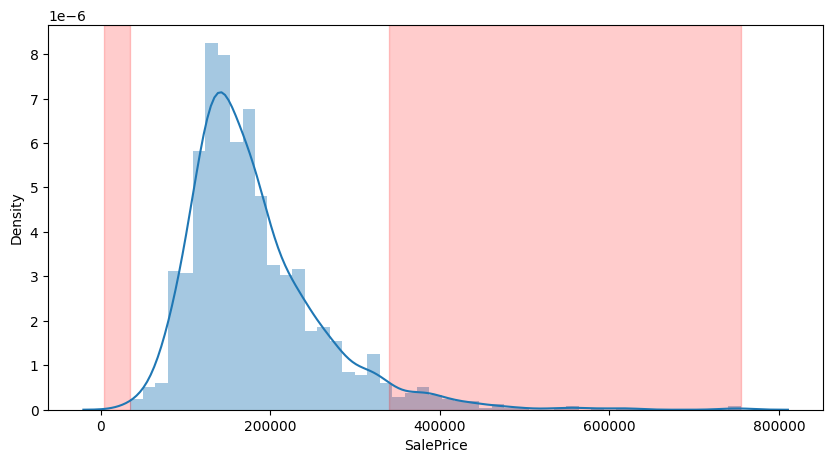

In [9]:
plt.figure(figsize = (10,5))
sns.distplot(df.SalePrice)
plt.axvspan(xmin = lower, xmax= min(df.SalePrice), alpha=0.2, color='red')
plt.axvspan(xmin = upper, xmax= max(df.SalePrice), alpha=0.2, color='red')
plt.xlabel("SalePrice")
plt.show()

In [10]:
new_df = df.copy()
cols = new_df.columns
idx_to_remove = set()

for col in cols:
    outlier, lower, upper = outliers_IQR(new_df[col])
    idx_to_remove = idx_to_remove | set(outlier)
    

new_df.drop(idx_to_remove, inplace=True)
new_df

,LotFrontage,LotArea,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,log_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.150685,0.033420,3.0,6.0,0.949275,0.883333,1.0,0.12250,2.0,2.0,...,2.0,0.368280,5.0,5.0,2.0,0.000000,0.082210,4.0,208500.0,12.247694
2,0.202055,0.038795,3.0,5.0,0.753623,0.433333,1.0,0.00000,3.0,1.0,...,2.0,0.309140,5.0,5.0,2.0,0.209270,0.000000,4.0,181500.0,12.109011
10,0.099315,0.028605,3.0,4.0,0.485507,0.000000,1.0,0.00000,3.0,0.0,...,1.0,0.137769,2.0,5.0,2.0,0.000000,0.005391,4.0,118000.0,11.678440
12,0.219178,0.049658,0.0,8.0,0.963768,0.933333,2.0,0.17875,0.0,2.0,...,3.0,0.494624,5.0,5.0,2.0,0.103230,0.028302,5.0,345000.0,12.751300
16,0.102740,0.022529,3.0,6.0,0.413043,0.850000,1.0,0.00000,3.0,0.0,...,2.0,0.387097,5.0,5.0,2.0,0.033708,0.150943,4.0,132000.0,11.790557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,0.143836,0.033654,3.0,6.0,0.956522,0.900000,1.0,0.06625,2.0,2.0,...,2.0,0.420699,5.0,5.0,2.0,0.134831,0.080863,4.0,179600.0,12.098487
1452,0.195205,0.037215,3.0,7.0,0.985507,0.983333,2.0,0.12125,2.0,2.0,...,3.0,0.564516,5.0,5.0,2.0,0.000000,0.048518,5.0,287090.0,12.567551
1454,0.236301,0.074398,3.0,4.0,0.971014,0.933333,1.0,0.00000,3.0,2.0,...,0.0,0.000000,3.0,3.0,2.0,0.025281,0.075472,0.0,84500.0,11.344507
